### 조선 일보 데이터크롤러

```
Arguments : query_word, (period)

return : title_list, category_list, body_list
```

In [2]:
import requests
from bs4 import BeautifulSoup
from time import sleep

In [11]:
def body_extractor(link):
    soup = BeautifulSoup(requests.get(link).content, 'html.parser')
    
    text = ""
    for t in soup.select(".par"):
        text += " " + t.text

    return text.strip()

def chosun_crawler(query, period=None):
    
    # data containers 
    titles = []
    links = []
    categories = []
    dates = []
    bodies = []
    
    i = 1 
#     link_connect_signal = 1
    nobody = 0
    
    while True:
        try : 
            print("-" * 30)
            print('{} page is start'.format(i))

#             url = "http://search.chosun.com/search/news.search?query={}&pageno={}&orderby=news".format(query, i)
            url = "http://nsearch.chosun.com/search/total.search?query={}&sort=1&pn={}".format(query, i)
            res = requests.get(url)
            soup = BeautifulSoup(res.content, 'html.parser')

            if soup.select(".result_none"):
                print('***** no result! *****')
                break

            for art, info in zip(soup.select("dt > a"), soup.select(".art_info")):

                title = art.text
                if len(title) == 0:
                    nobody += 1
                    continue

                link = art["href"]
                if len(link) == 0:
                    nobody += 1
                    continue

                category = info.select_one(".bread_crumbs").text
                if len(category) == 0:
                    category = 'unknown_category'

                date = info.select_one(".date").text
                if len(date) == 0:
                    date = "unknown_date"
                
                try:
                    body = body_extractor(link)
                    if len(body) == 0:
                        print("no body")
                        nobody += 1
                        continue

                except Exception as ex:
                    print(ex)
                    nobody += 1
                    continue
                print(title)
                titles.append(title)
                links.append(link)
                categories.append(category) 
                dates.append(date)
                bodies.append(body)

            print('{} page is done'.format(i))
            i += 1
        except:
            print("**"*30)
            print("wait.....")
            print("**"*30)
            sleep(5)
            continue
    return [titles, links, categories, dates, bodies], nobody

#### 미세먼지

In [12]:
data_dust, nobody_dust = chosun_crawler('전기요금')

------------------------------
1 page is start
1 page is done
------------------------------
2 page is start
2 page is done
------------------------------
3 page is start
3 page is done
------------------------------
4 page is start
4 page is done
------------------------------
5 page is start
5 page is done
------------------------------
6 page is start
6 page is done
------------------------------
7 page is start
7 page is done
------------------------------
8 page is start
8 page is done
------------------------------
9 page is start
9 page is done
------------------------------
10 page is start
10 page is done
------------------------------
11 page is start
11 page is done
------------------------------
12 page is start
12 page is done
------------------------------
13 page is start
13 page is done
------------------------------
14 page is start
14 page is done
------------------------------
15 page is start
15 page is done
------------------------------
16 page is start
16 page is

138 page is done
------------------------------
139 page is start
139 page is done
------------------------------
140 page is start
140 page is done
------------------------------
141 page is start
141 page is done
------------------------------
142 page is start
142 page is done
------------------------------
143 page is start
143 page is done
------------------------------
144 page is start
144 page is done
------------------------------
145 page is start
145 page is done
------------------------------
146 page is start
146 page is done
------------------------------
147 page is start
147 page is done
------------------------------
148 page is start
148 page is done
------------------------------
149 page is start
149 page is done
------------------------------
150 page is start
150 page is done
------------------------------
151 page is start
151 page is done
------------------------------
152 page is start
152 page is done
------------------------------
153 page is start
153 page i

KeyboardInterrupt: 

In [ ]:
nobody

##### 1st 시도
-  page : 253
-  nobody_dust : 59

##### 2nd 시도

- page : 861
- Memory error

In [4]:
import pandas as pd

df = pd.DataFrame()

df["title"] = data_dust[0]
df["link"] = data_dust[1]
df["category"] = data_dust[2]
df["date"] = data_dust[3]
df["body"] = data_dust[4]
df

,title,link,category,date,body
0,"올여름엔 착한 선크림이 대세…올리브영, '무기자차' 매출 58% 급증",http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 산업,2019. 6. 20 (목),선크림도 착해야 팔린다.CJ올리브네트웍스가 운영하는 헬스앤뷰티(H&B) 스토어 올리...
1,'에너지 산업의 미래'…2019 미래에너지 포럼 개막,http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 산업,2019. 6. 20 (목),‘에너지 산업의 미래’을 주제로 한 ‘2019 미래에너지 포럼’이 20일 서울 소공...
2,'초여름 무더위' 전국 맑은 하늘...낮 최고 32도,http://news.chosun.com/site/data/html_dir/2019...,조선닷컴 > 사회,2019. 6. 20 (목),목요일인 20일 모처럼 전국이 맑은 하늘을 보이겠다. 다만 낮 최고기온이 30도를 ...
3,미세먼지 잡는 아파트… '準강남' 성남 구도심에 우뚝,http://news.chosun.com/site/data/html_dir/2019...,조선일보 > 특집섹션,2019. 6. 20 (목),"하남 감일과 위례, 성남으로 이어지는 강남 주거 벨트에 수요자들의 관심이 뜨겁다. ..."
4,걸어서 4개 지하철 노선 이용 가능… 초역세권 입지 꿰찼다,http://news.chosun.com/site/data/html_dir/2019...,조선일보 > 특집섹션,2019. 6. 20 (목),현대엔지니어링이 서울 중심업무지구(CBD)에 위치한 세운재정비촉진지구(이하 세운지구...
5,"반도건설, 쌍문역 청년주택 219억원에 시공계약 수주",http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 부동산,2019. 6. 19 (수),반도건설은 서울 도봉구 쌍문역세권에 들어서는 ‘쌍문역 청년주택 신축공사’의 시공사로...
6,"강남구, 코엑스 광장서 '에어돔 공연장' 시범 운영",http://news.chosun.com/site/data/html_dir/2019...,조선닷컴 > 사회,2019. 6. 19 (수),서울 강남구는 오는 22~23일 이틀간 삼성동 코엑스 동측 광장 앞에서 에어돔 공연...
7,미세먼지에 늘 노출된 택시기사…5명 중 1명 폐질환 의심,http://news.chosun.com/site/data/html_dir/2019...,조선닷컴 > 라이프,2019. 6. 19 (수),미세먼지 등 대기오염에 쉽게 노출되는 택시기사 5명 가운데 1명은 만성폐쇄성폐질환(...
8,"10명 중 7명 ""원전 유지·확대해야""…'원전 제로' 찬성 5.8%뿐",http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 산업,2019. 6. 18 (화),우리나라 국민 10명 중 7명이 원자력발전(원전) 비중‘유지·확대’를 지지한다는 조...
9,수도권 천둥·번개 동반한 비 내리다 오후에 그쳐,http://news.chosun.com/site/data/html_dir/2019...,조선닷컴 > 사회,2019. 6. 18 (화),밤사이 천둥과 번개를 동반하며 내렸던 비가 18일 오후 들면서 소강상태를 보이겠다....


In [5]:
import pickle 

with open('chosun_dust.pkl', "wb") as f:
    pickle.dump(df, f)

In [6]:
with open('chosun_dust.pkl', "rb") as f:
    sla = pickle.load(f)

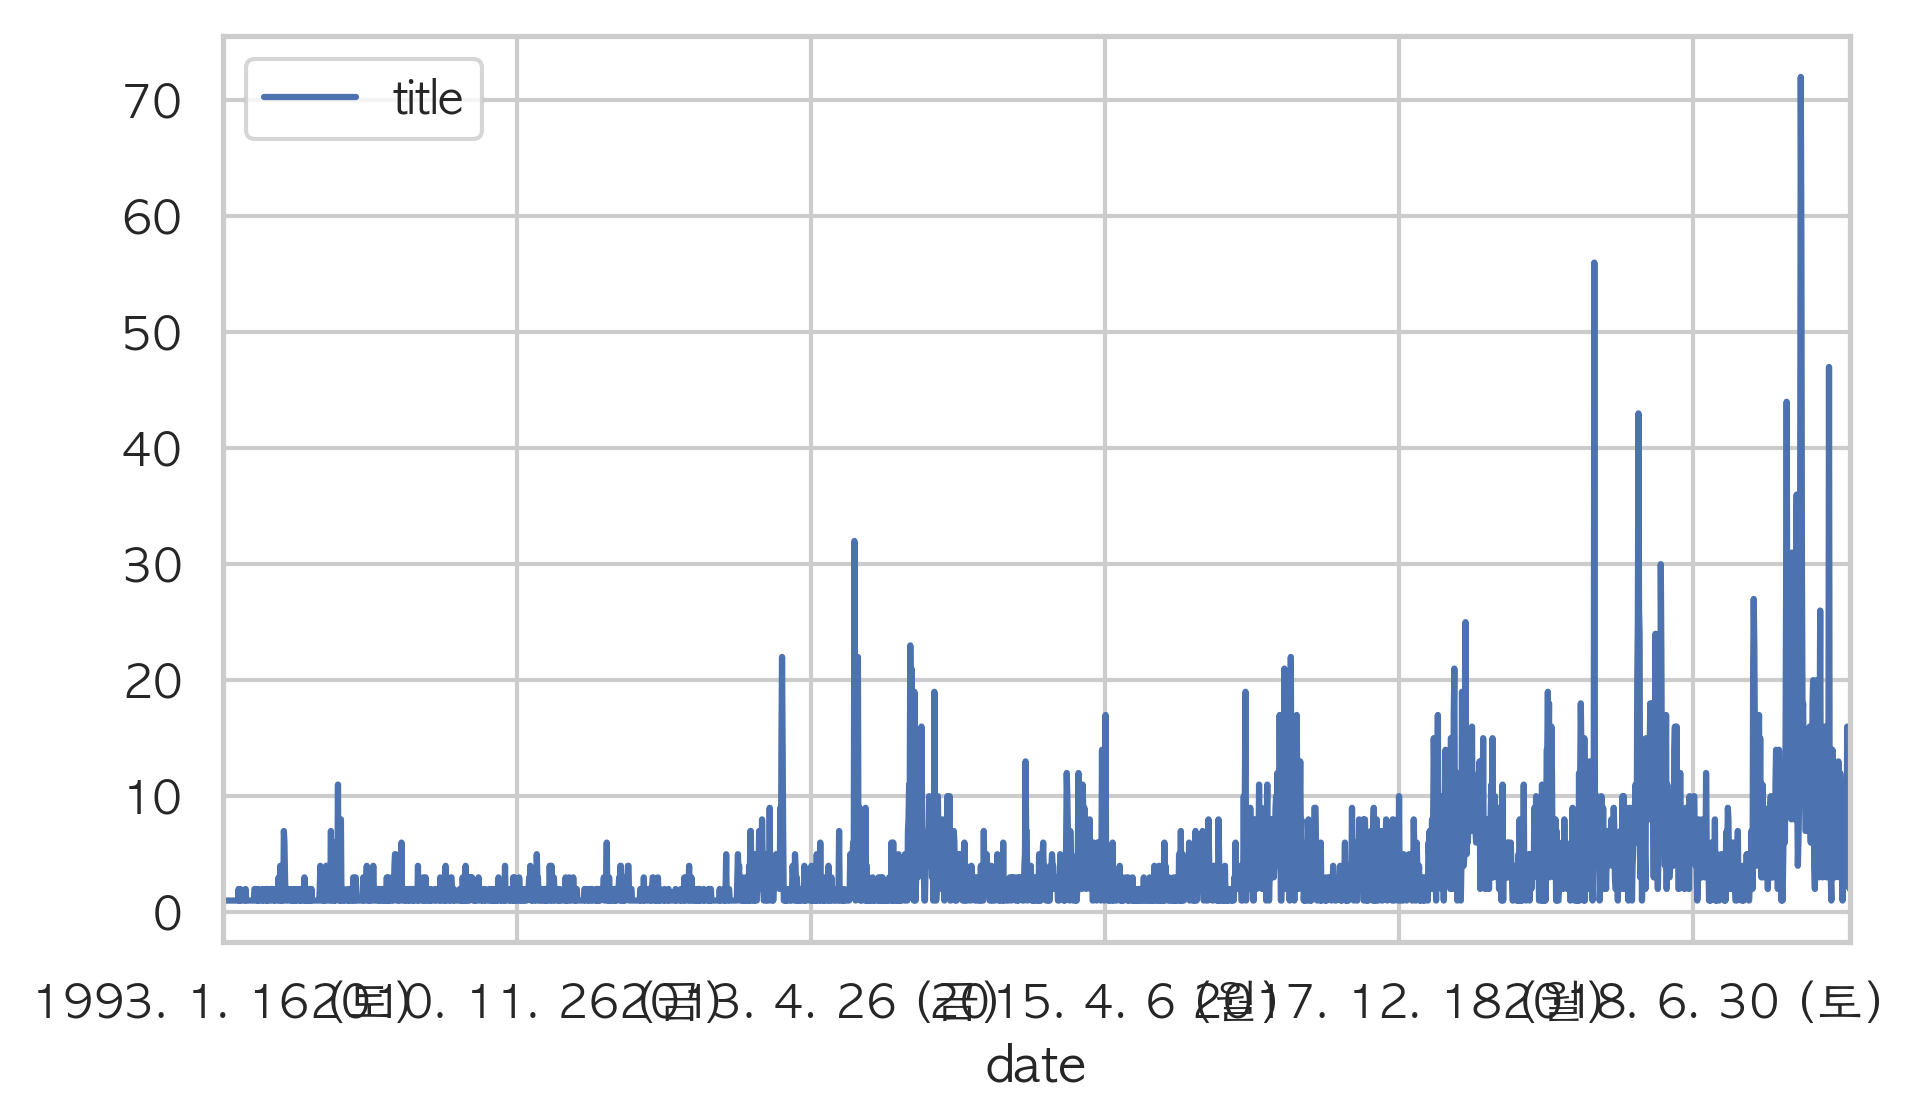

In [9]:
fig, ax = plt.subplots(1,1,figsize=(21, 11))
sla.groupby(by='date').count().plot(y="title", ax=ax)

#### 노인

In [5]:
data_elder, nobody_elder = chosun_crawler('미세먼지')

------------------------------
1 page is start
1 page is done
------------------------------
2 page is start
2 page is done
------------------------------
3 page is start
3 page is done
------------------------------
4 page is start
4 page is done
------------------------------
5 page is start
5 page is done
------------------------------
6 page is start
6 page is done
------------------------------
7 page is start
7 page is done
------------------------------
8 page is start
8 page is done
------------------------------
9 page is start
9 page is done
------------------------------
10 page is start
10 page is done
------------------------------
11 page is start
11 page is done
------------------------------
12 page is start
12 page is done
------------------------------
13 page is start
13 page is done
------------------------------
14 page is start
14 page is done
------------------------------
15 page is start
15 page is done
------------------------------
16 page is start
16 page is

126 page is done
------------------------------
127 page is start
127 page is done
------------------------------
128 page is start
128 page is done
------------------------------
129 page is start
no body
no body
129 page is done
------------------------------
130 page is start
no body
no body
no body
130 page is done
------------------------------
131 page is start
131 page is done
------------------------------
132 page is start
132 page is done
------------------------------
133 page is start
133 page is done
------------------------------
134 page is start
134 page is done
------------------------------
135 page is start
no body
135 page is done
------------------------------
136 page is start
136 page is done
------------------------------
137 page is start
no body
no body
no body
137 page is done
------------------------------
138 page is start
138 page is done
------------------------------
139 page is start
139 page is done
------------------------------
140 page is start
no b

245 page is done
------------------------------
246 page is start
246 page is done
------------------------------
247 page is start
247 page is done
------------------------------
248 page is start
248 page is done
------------------------------
249 page is start
249 page is done
------------------------------
250 page is start
250 page is done
------------------------------
251 page is start
251 page is done
------------------------------
252 page is start
252 page is done
------------------------------
253 page is start
253 page is done
------------------------------
254 page is start
254 page is done
------------------------------
255 page is start
255 page is done
------------------------------
256 page is start
256 page is done
------------------------------
257 page is start
257 page is done
------------------------------
258 page is start
258 page is done
------------------------------
259 page is start
259 page is done
------------------------------
260 page is start
260 page i

366 page is done
------------------------------
367 page is start
367 page is done
------------------------------
368 page is start
368 page is done
------------------------------
369 page is start
369 page is done
------------------------------
370 page is start
no body
370 page is done
------------------------------
371 page is start
no body
371 page is done
------------------------------
372 page is start
372 page is done
------------------------------
373 page is start
373 page is done
------------------------------
374 page is start
374 page is done
------------------------------
375 page is start
375 page is done
------------------------------
376 page is start
376 page is done
------------------------------
377 page is start
377 page is done
------------------------------
378 page is start
378 page is done
------------------------------
379 page is start
no body
379 page is done
------------------------------
380 page is start
380 page is done
------------------------------
381 

483 page is done
------------------------------
484 page is start
484 page is done
------------------------------
485 page is start
485 page is done
------------------------------
486 page is start
no body
486 page is done
------------------------------
487 page is start
487 page is done
------------------------------
488 page is start
no body
no body
488 page is done
------------------------------
489 page is start
no body
489 page is done
------------------------------
490 page is start
490 page is done
------------------------------
491 page is start
491 page is done
------------------------------
492 page is start
no body
492 page is done
------------------------------
493 page is start
493 page is done
------------------------------
494 page is start
494 page is done
------------------------------
495 page is start
495 page is done
------------------------------
496 page is start
496 page is done
------------------------------
497 page is start
no body
497 page is done
-----------

597 page is done
------------------------------
598 page is start
no body
598 page is done
------------------------------
599 page is start
no body
no body
599 page is done
------------------------------
600 page is start
no body
600 page is done
------------------------------
601 page is start
601 page is done
------------------------------
602 page is start
602 page is done
------------------------------
603 page is start
no body
603 page is done
------------------------------
604 page is start
no body
604 page is done
------------------------------
605 page is start
no body
no body
605 page is done
------------------------------
606 page is start
no body
606 page is done
------------------------------
607 page is start
607 page is done
------------------------------
608 page is start
608 page is done
------------------------------
609 page is start
no body
609 page is done
------------------------------
610 page is start
610 page is done
------------------------------
611 page is st

no body
716 page is done
------------------------------
717 page is start
717 page is done
------------------------------
718 page is start
718 page is done
------------------------------
719 page is start
719 page is done
------------------------------
720 page is start
720 page is done
------------------------------
721 page is start
721 page is done
------------------------------
722 page is start
no body
722 page is done
------------------------------
723 page is start
723 page is done
------------------------------
724 page is start
no body
724 page is done
------------------------------
725 page is start
725 page is done
------------------------------
726 page is start
726 page is done
------------------------------
727 page is start
727 page is done
------------------------------
728 page is start
728 page is done
------------------------------
729 page is start
no body
729 page is done
------------------------------
730 page is start
730 page is done
---------------------------

810 page is done
------------------------------
811 page is start
811 page is done
------------------------------
812 page is start
no body
812 page is done
------------------------------
813 page is start
no body
813 page is done
------------------------------
814 page is start
no body
814 page is done
------------------------------
815 page is start
815 page is done
------------------------------
816 page is start
816 page is done
------------------------------
817 page is start
817 page is done
------------------------------
818 page is start
818 page is done
------------------------------
819 page is start
HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2014/04/01/2014040104321.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c1c676198>: Failed to establish a new connection: [Errno 61] Connection refused',))
HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with 

no body
906 page is done
------------------------------
907 page is start
907 page is done
------------------------------
908 page is start
no body
908 page is done
------------------------------
909 page is start
909 page is done
------------------------------
910 page is start
910 page is done
------------------------------
911 page is start
911 page is done
------------------------------
912 page is start
912 page is done
------------------------------
913 page is start
913 page is done
------------------------------
914 page is start
914 page is done
------------------------------
915 page is start
no body
no body
915 page is done
------------------------------
916 page is start
916 page is done
------------------------------
917 page is start
917 page is done
------------------------------
918 page is start
918 page is done
------------------------------
919 page is start
919 page is done
------------------------------
920 page is start
no body
920 page is done
-------------------

HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2011/11/17/2011111700852.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c1c5e1d68>: Failed to establish a new connection: [Errno 61] Connection refused',))
982 page is done
------------------------------
983 page is start
983 page is done
------------------------------
984 page is start
no body
984 page is done
------------------------------
985 page is start
985 page is done
------------------------------
986 page is start
986 page is done
------------------------------
987 page is start
987 page is done
------------------------------
988 page is start
988 page is done
------------------------------
989 page is start
HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2010/04/09/2010040900744.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c1c9ca400>: Fa

HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2009/06/24/2009062400508.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c1c4996a0>: Failed to establish a new connection: [Errno 61] Connection refused',))
HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2008/01/27/2008012788002.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c1b0fb748>: Failed to establish a new connection: [Errno 61] Connection refused',))
1030 page is done
------------------------------
1031 page is start
1031 page is done
------------------------------
1032 page is start
1032 page is done
------------------------------
1033 page is start
no body
1033 page is done
------------------------------
1034 page is start
no body
1034 page is done
------------------------------
1035 page is start
1035 page is done
--------------------------

no body
HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2006/02/13/2006021388016.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c1c4a9ef0>: Failed to establish a new connection: [Errno 61] Connection refused',))
1062 page is done
------------------------------
1063 page is start
no body
1063 page is done
------------------------------
1064 page is start
no body
no body
HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2005/12/22/2005122288005.html (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1c1b1f8a90>: Failed to establish a new connection: [Errno 61] Connection refused',))
no body
no body
no body
no body
no body
1064 page is done
------------------------------
1065 page is start
HTTPConnectionPool(host='car.biz.chosun.com', port=80): Max retries exceeded with url: /site/data/html_dir/2006/04/12/200604

no body
no body
no body
no body
no body
no body
no body
1097 page is done
------------------------------
1098 page is start
no body
no body
no body
no body
no body
no body
1098 page is done
------------------------------
1099 page is start
no body
no body
no body
no body
no body
no body
no body
1099 page is done
------------------------------
1100 page is start
no body
no body
no body
no body
1100 page is done
------------------------------
1101 page is start
no body
no body
no body
no body
no body
1101 page is done
------------------------------
1102 page is start
no body
no body
no body
no body
no body
no body
no body
no body
no body
1102 page is done
------------------------------
1103 page is start
no body
no body
no body
no body
no body
1103 page is done
------------------------------
1104 page is start
no body
no body
no body
no body
no body
1104 page is done
------------------------------
1105 page is start
no body
no body
no body
no body
no body
no body
no body
no body
1105 pag

In [8]:
import pandas as pd

df = pd.DataFrame()

df["title"] = data_elder[0]
df["link"] = data_elder[1]
df["category"] = data_elder[2]
df["date"] = data_elder[3]
df["body"] = data_elder[4]
df

,title,link,category,date,body
0,"""우산 챙기세요"" 낮부터 중부지방 비…서울 낮 26도·광주 30도",http://news.chosun.com/site/data/html_dir/2019...,조선닷컴 > 사회,2019. 6. 21 (금),금요일인 21일 수도권을 중심으로 낮부터 비가 내리겠다. 일부 지역에선 돌풍을 동반...
1,"[미래에너지] 에너지, 환경 위기 극복하려면 탈원전 중단해야",http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 산업,2019. 6. 20 (목),"‘2019 미래에너지포럼’ 성황리 종료 ""탈탄소화에 성공한 국가들은 원자력을 이용했..."
2,"[미래에너지] 세계적 환경운동가 셸렌버거, 탈원전 반대 韓 원자력공학도 후원",http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 산업,2019. 6. 20 (목),"""탈원전에 매몰돼 기후변화를 다스리지 못하고 있다. 국제적으로 기후변화에 대응하는 ..."
3,㈜트라움하우스 '더 라움 펜트하우스' 계약 시작 석 달 만에 완판,http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 피플,2019. 6. 20 (목),㈜트라움하우스는 소형 럭셔리 오피스텔 ‘더 라움 펜트하우스’ 전 세대가 계약 시작 ...
4,"올여름엔 착한 선크림이 대세…올리브영, '무기자차' 매출 58% 급증",http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 산업,2019. 6. 20 (목),선크림도 착해야 팔린다.CJ올리브네트웍스가 운영하는 헬스앤뷰티(H&B) 스토어 올리...
5,'에너지 산업의 미래'…2019 미래에너지 포럼 개막,http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 산업,2019. 6. 20 (목),‘에너지 산업의 미래’을 주제로 한 ‘2019 미래에너지 포럼’이 20일 서울 소공...
6,'초여름 무더위' 전국 맑은 하늘...낮 최고 32도,http://news.chosun.com/site/data/html_dir/2019...,조선닷컴 > 사회,2019. 6. 20 (목),목요일인 20일 모처럼 전국이 맑은 하늘을 보이겠다. 다만 낮 최고기온이 30도를 ...
7,미세먼지 잡는 아파트… '準강남' 성남 구도심에 우뚝,http://news.chosun.com/site/data/html_dir/2019...,조선일보 > 특집섹션,2019. 6. 20 (목),"하남 감일과 위례, 성남으로 이어지는 강남 주거 벨트에 수요자들의 관심이 뜨겁다. ..."
8,걸어서 4개 지하철 노선 이용 가능… 초역세권 입지 꿰찼다,http://news.chosun.com/site/data/html_dir/2019...,조선일보 > 특집섹션,2019. 6. 20 (목),현대엔지니어링이 서울 중심업무지구(CBD)에 위치한 세운재정비촉진지구(이하 세운지구...
9,"반도건설, 쌍문역 청년주택 219억원에 시공계약 수주",http://biz.chosun.com/site/data/html_dir/2019/...,조선경제i > 부동산,2019. 6. 19 (수),반도건설은 서울 도봉구 쌍문역세권에 들어서는 ‘쌍문역 청년주택 신축공사’의 시공사로...


In [9]:
import pickle 

with open('chosun_elder.pkl', "wb") as f:
    pickle.dump(df, f)

In [10]:
with open('chosun_elder.pkl', "rb") as f:
    sla = pickle.load(f)

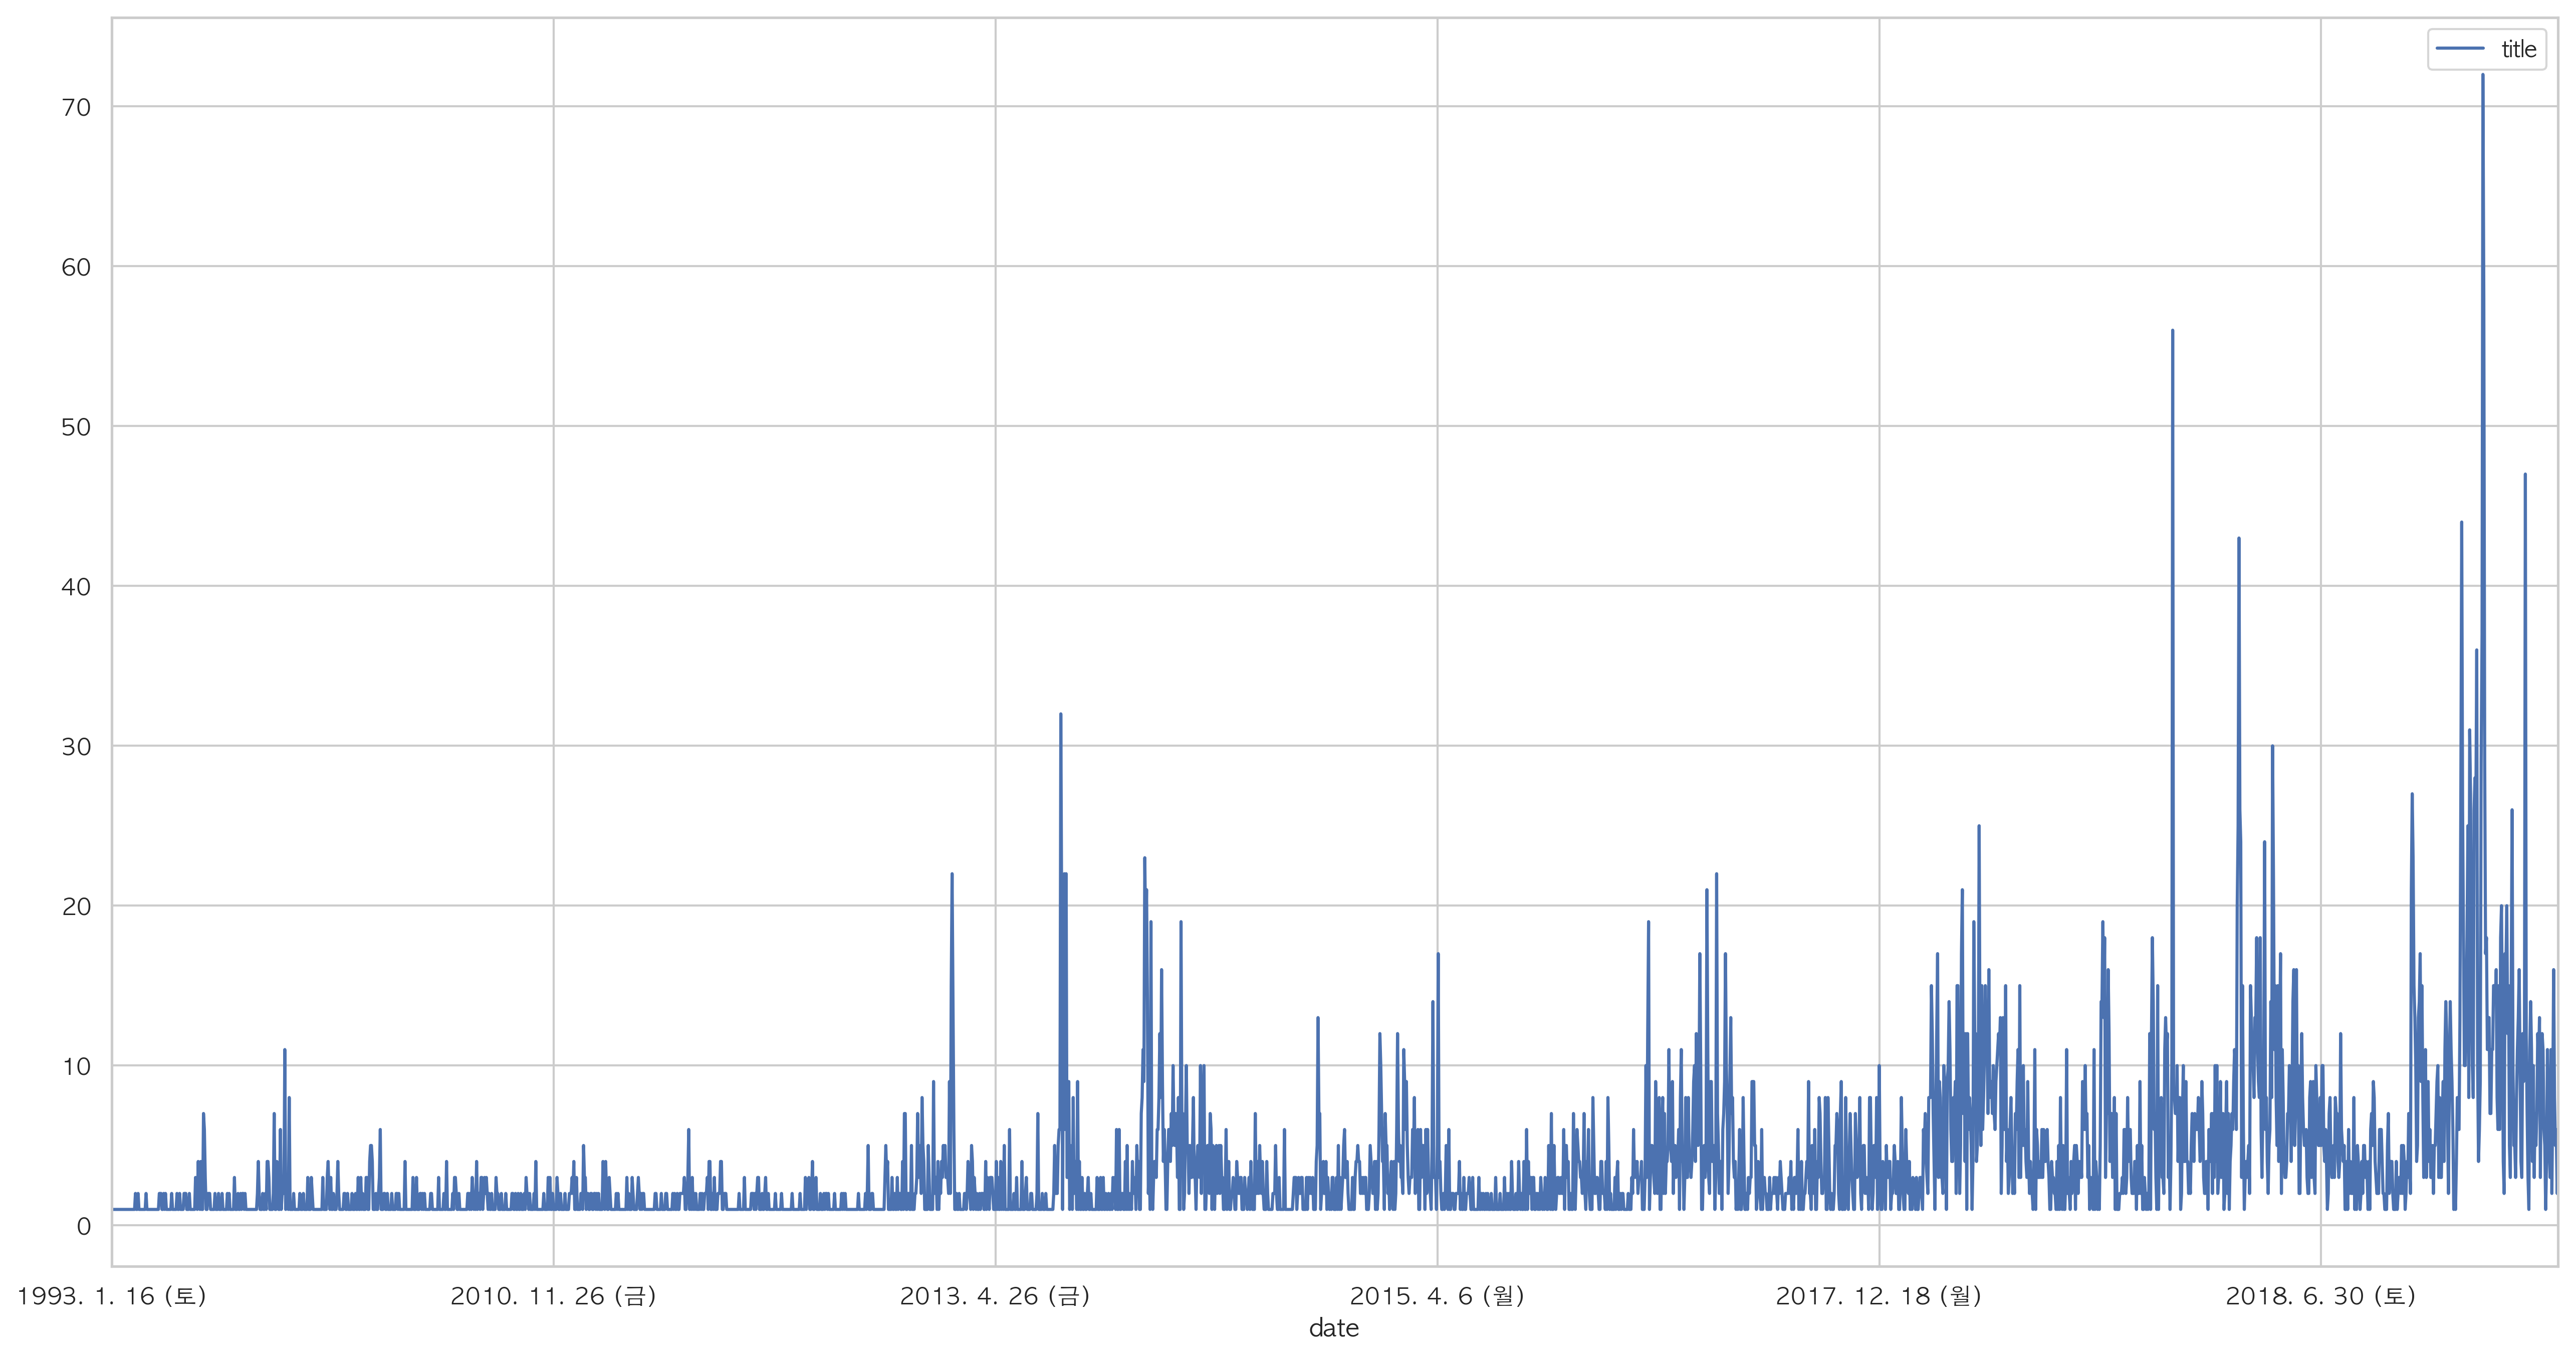

In [12]:
fig, ax = plt.subplots(1,1,figsize=(21, 11))
sla.groupby(by='date').count().plot(y="title", ax=ax)